In [91]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

transform =transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)),])

trainset=datasets.MNIST('~/.pytorch/MNIST_data/',download=True, train=True, transform=transform )
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

In [92]:
model=nn.Sequential(nn.Linear(784,128), nn.ReLU(),nn.Linear(128,64),nn.ReLU(),nn.Linear(64,10))
criterion=nn.CrossEntropyLoss()
images,labels=next(iter(trainloader))
images=images.view(images.shape[0],-1)

logits=model(images)
loss=criterion(logits,labels)
print(loss)

tensor(2.2881, grad_fn=<NllLossBackward>)


In [93]:
#USING  SOFTMAX FUNCTION

model=nn.Sequential(nn.Linear(784,128),nn.ReLU(),nn.Linear(128,64),nn.ReLU(),nn.Linear(64,10),nn.LogSoftmax(dim=1))
criterion=nn.NLLLoss()

images,labels=next(iter(trainloader))

images=images.view(images.shape[0],-1)
logps=model(images)
loss=criterion(logps,labels)
print(loss)

tensor(2.2759, grad_fn=<NllLossBackward>)


In [94]:
#Showing the working of Autograd. This is used for backpropagation

x=torch.randn(2,2,requires_grad=True)
print(x)

y=x**2
print(y)


tensor([[ 0.2547, -0.3463],
        [ 0.4361,  0.1283]], requires_grad=True)
tensor([[0.0649, 0.1200],
        [0.1902, 0.0165]], grad_fn=<PowBackward0>)


In [95]:
print(y.grad_fn)

In [96]:
z=y.mean()
print(z)

tensor(0.0979, grad_fn=<MeanBackward1>)


In [97]:
print(x.grad)

None


In [98]:
z.backward()

In [99]:
print(x.grad)

tensor([[ 0.1273, -0.1732],
        [ 0.2181,  0.0642]])


In [100]:
print(x/2)

tensor([[ 0.1273, -0.1732],
        [ 0.2181,  0.0642]], grad_fn=<DivBackward0>)


In [101]:
##Coming back to the the main problem. Using the Autograd with loss function
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels)

In [102]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0008,  0.0008,  0.0008,  ...,  0.0008,  0.0008,  0.0008],
        [-0.0011, -0.0011, -0.0011,  ..., -0.0011, -0.0011, -0.0011],
        [-0.0007, -0.0007, -0.0007,  ..., -0.0007, -0.0007, -0.0007],
        ...,
        [-0.0009, -0.0009, -0.0009,  ..., -0.0009, -0.0009, -0.0009],
        [ 0.0013,  0.0013,  0.0013,  ...,  0.0013,  0.0013,  0.0013],
        [-0.0012, -0.0012, -0.0012,  ..., -0.0012, -0.0012, -0.0012]])


In [103]:
from torch import optim


optimizer = optim.SGD(model.parameters(), lr=0.01)

In [104]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)


optimizer.zero_grad()


output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[-0.0318,  0.0133,  0.0107,  ..., -0.0036, -0.0129, -0.0067],
        [-0.0024,  0.0043, -0.0033,  ..., -0.0275, -0.0031,  0.0228],
        [-0.0161, -0.0357, -0.0008,  ...,  0.0012,  0.0326,  0.0132],
        ...,
        [-0.0302, -0.0339,  0.0238,  ...,  0.0055,  0.0139, -0.0169],
        [-0.0324,  0.0083,  0.0223,  ...,  0.0145,  0.0241,  0.0334],
        [ 0.0323,  0.0339,  0.0260,  ..., -0.0005,  0.0088, -0.0299]],
       requires_grad=True)
Gradient - tensor([[ 0.0019,  0.0019,  0.0019,  ...,  0.0019,  0.0019,  0.0019],
        [-0.0004, -0.0004, -0.0004,  ..., -0.0004, -0.0004, -0.0004],
        [-0.0005, -0.0005, -0.0005,  ..., -0.0005, -0.0005, -0.0005],
        ...,
        [ 0.0021,  0.0021,  0.0021,  ...,  0.0021,  0.0021,  0.0021],
        [ 0.0030,  0.0030,  0.0030,  ...,  0.0030,  0.0030,  0.0030],
        [ 0.0018,  0.0018,  0.0018,  ...,  0.0018,  0.0018,  0.0018]])


In [105]:
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[-0.0318,  0.0133,  0.0107,  ..., -0.0036, -0.0129, -0.0067],
        [-0.0024,  0.0043, -0.0033,  ..., -0.0275, -0.0031,  0.0228],
        [-0.0161, -0.0357, -0.0008,  ...,  0.0012,  0.0326,  0.0132],
        ...,
        [-0.0302, -0.0339,  0.0238,  ...,  0.0055,  0.0139, -0.0169],
        [-0.0324,  0.0082,  0.0223,  ...,  0.0145,  0.0240,  0.0334],
        [ 0.0323,  0.0339,  0.0259,  ..., -0.0005,  0.0088, -0.0299]],
       requires_grad=True)


In [106]:
##Now training the same algorithm in a loop

model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
    
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.9208926347527169
Training loss: 0.8347641978817962
Training loss: 0.5039233458575918
Training loss: 0.416378460411451
Training loss: 0.37570927271456606


In [107]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

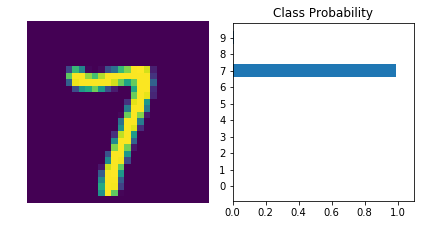

In [108]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
view_classify(img.view(1, 28, 28), ps)